# **PREPROCESSING**

Reading Training DF

In [0]:
# Training data of 400 songs
import pandas as pd

df = pd.read_csv('/content/french_training_data.csv')
df.columns = ['Lyrics', 'Mood']
df.head()

,Lyrics,Mood
0,Une histoire qui tombe √† l'eau\nQuelques mots...,Sad
1,"Cas√© dans des cases, fich√© sur des fiches\nA...",Sad
2,"Ohh...\n\nChanter, chanter pour se dessiner un...",Sad
3,Le pardon commence o√π s'arr√™te la rancune\nI...,Sad
4,"(Kery James)\nTu peux pas t'sais, c'est profon...",Happy


Encoding Mood Values

In [0]:
from sklearn.preprocessing import LabelEncoder
# import pickle
import numpy as np

x_train = df['Lyrics'].values 
y_train = df['Mood'].values

print('before: %s ...' %y_train[:20])

le = LabelEncoder()
le.fit(y_train)
y_train = le.transform(y_train)

print('after: %s ...' %y_train[:20])

before: ['Sad' 'Sad' 'Sad' 'Sad' 'Happy' 'Happy' 'Sad' 'Sad' 'Sad' 'Sad' 'Happy'
 'Sad' 'Sad' 'Sad' 'Happy' 'Happy' 'Happy' 'Sad' 'Happy' 'Sad'] ...
after: [1 1 1 1 0 0 1 1 1 1 0 1 1 1 0 0 0 1 0 1] ...


In [0]:
!pip install nltk

Stemming (SnowballStemmer)

In [0]:
""" The following languages are supported: Danish, Dutch, English, Finnish, French, 
German, Hungarian, Italian, Norwegian, Portuguese, Romanian, Russian, Spanish 
and Swedish """
import nltk
import re
from nltk import word_tokenize
from nltk.stem import SnowballStemmer


def snowball_tokenizer(text, stemmer = SnowballStemmer('french')):
  lower_txt = text.lower()
  tokens = nltk.wordpunct_tokenize(lower_txt)
  stemmed_text = [stemmer.stem(i) for i in tokens]
  no_punct = [s for s in stemmed_text if re.match('^[a-zA-Z]+$', s) is not None]
  return stemmed_text


snowball_tokenizer("Aller")

# stemmed_text = [stemmer.stem(i) for i in word_tokenize(text)

['aller']

Stopwords File

In [0]:
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
stp = stopwords.words('french')
with open('./stopwords_french.txt', 'w') as outfile:
   outfile.write('\n'.join(stp))

with open('./stopwords_french.txt', 'r') as infile:
    stop_words = infile.read().splitlines()
print('stop words %s ...' %stop_words[:5])

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
stop words ['au', 'aux', 'avec', 'ce', 'ces'] ...


# **VECTORIZING METHODS**

## Feature extraction: Word counts and Vectorizers

Count Vectorizer

In [0]:
from sklearn.feature_extraction.text import CountVectorizer

vec = CountVectorizer(
            encoding='utf-8',
            decode_error='replace',
            strip_accents='unicode',
            analyzer='word',
            binary=False,
            stop_words=stop_words,
            tokenizer=snowball_tokenizer,
            ngram_range=(1,1)
    )

vocab = ["Je vais à la plage. À plus tard!"]

vec = vec.fit(vocab)

sentence1 = vec.transform([u'Plus tard sur la plage!'])
sentence2 = vec.transform(['Je dois y aller'])


print('TEST:')
print('Vocabulary: %s' %vec.get_feature_names())
print('Sentence 1: %s' %sentence1.toarray())
print('Sentence 2: %s' %sentence2.toarray())

TEST:
Vocabulary: ['!', '.', 'a', 'plag', 'plus', 'tard', 'vais']
Sentence 1: [[1 0 0 1 1 1 0]]
Sentence 2: [[0 0 0 0 0 0 0]]


/usr/local/lib/python3.6/dist-packages/sklearn/feature_extraction/text.py:507: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn("The parameter 'token_pattern' will not be used"
/usr/local/lib/python3.6/dist-packages/sklearn/feature_extraction/text.py:385: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ['a', 'aur', 'aurion', 'auron', 'avi', 'avion', 'avon', 'ayon', 'dan', 'e', 'etaient', 'etais', 'etait', 'etant', 'ete', 'eti', 'etion', 'eum', 'euss', 'eussion', 'fum', 'fuss', 'fussion', 'mem', 'notr', 'ser', 'serion', 'seron', 'soi', 'somm', 'soyon', 'votr'] not in stop_words.
  'stop_words.' % sorted(inconsistent))


In [0]:
vec = vec.fit(x_train.ravel())

/usr/local/lib/python3.6/dist-packages/sklearn/feature_extraction/text.py:507: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn("The parameter 'token_pattern' will not be used"


TF-IDF Vectorizer

In [0]:
from sklearn.feature_extraction.text import TfidfVectorizer

tfidf = TfidfVectorizer(
            encoding='utf-8',
            decode_error='replace',
            strip_accents='unicode',
            analyzer='word',
            binary=False,
            stop_words=stop_words,
            tokenizer=snowball_tokenizer
    )

In [0]:
vocab = ["Je vais à la plage. À plus tard!"]

tfidf = tfidf.fit(vocab)

sentence1 = tfidf.transform([u'Plus tard sur la plage!'])
sentence2 = tfidf.transform(['Je dois y aller \n'])


print('TEST:')
print('Vocabulary: %s' %tfidf.get_feature_names())
print('Sentence 1: %s' %sentence1.toarray())
print('Sentence 2: %s' %sentence2.toarray())

TEST:
Vocabulary: ['!', '.', 'a', 'plag', 'plus', 'tard', 'vais']
Sentence 1: [[0.5 0.  0.  0.5 0.5 0.5 0. ]]
Sentence 2: [[0. 0. 0. 0. 0. 0. 0.]]


/usr/local/lib/python3.6/dist-packages/sklearn/feature_extraction/text.py:507: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn("The parameter 'token_pattern' will not be used"
/usr/local/lib/python3.6/dist-packages/sklearn/feature_extraction/text.py:385: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ['a', 'aur', 'aurion', 'auron', 'avi', 'avion', 'avon', 'ayon', 'dan', 'e', 'etaient', 'etais', 'etait', 'etant', 'ete', 'eti', 'etion', 'eum', 'euss', 'eussion', 'fum', 'fuss', 'fussion', 'mem', 'notr', 'ser', 'serion', 'seron', 'soi', 'somm', 'soyon', 'votr'] not in stop_words.
  'stop_words.' % sorted(inconsistent))


In [0]:
tfidf = tfidf.fit(x_train.ravel())

print('Vocabulary size: %s' %len(tfidf.get_feature_names()))

/usr/local/lib/python3.6/dist-packages/sklearn/feature_extraction/text.py:507: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn("The parameter 'token_pattern' will not be used"


Vocabulary size: 16286


# **Model Selection**

### **Models and F1-Score**

In [0]:
#Models: Multivariate Bernoulli and Multinomial Naive Bayes
from sklearn.naive_bayes import MultinomialNB
from sklearn.naive_bayes import BernoulliNB
from sklearn.pipeline import Pipeline

In [0]:
# Performance metric: F1-score

# Custom scorer methods to account for positive-negative class labels

from sklearn import metrics

# `pos_label` for positive class, since we have sad=1, happy=0

f1_scorer = metrics.make_scorer(metrics.f1_score, greater_is_better=True, pos_label=0)

## **Grid Search**

In [0]:
!pip install scikit-learn

In [0]:
# Grid Search with Count Vectorizer and Bernoulli Naive Bayes

from sklearn.model_selection import GridSearchCV
from pprint import pprint

pipeline_1 = Pipeline([
    ('vect', CountVectorizer()),
    ('clf', BernoulliNB())
])

parameters_1 = dict(
    vect__binary=[True],
    vect__stop_words=[stop_words, None],
    vect__tokenizer=[snowball_tokenizer, None],
    vect__ngram_range=[(1,1), (2,2), (3,3)],
)

grid_search_1 = GridSearchCV(pipeline_1, 
                           parameters_1, 
                           n_jobs=1, 
                           verbose=1,
                           scoring=f1_scorer,
                           cv=10                #Determines the cross-validation splitting strategy
                )


print("Performing grid search...")
print("pipeline:", [name for name, _ in pipeline_1.steps])
print("parameters:")
pprint(parameters_1, depth=2)
grid_search_1.fit(x_train, y_train)
print("Best score: %0.3f" % grid_search_1.best_score_)
print("Best parameters set:")
best_parameters_1 = grid_search_1.best_estimator_.get_params()
for param_name in sorted(parameters_1.keys()):
    print("\t%s: %r" % (param_name, best_parameters_1[param_name]))

Performing grid search...
pipeline: ['vect', 'clf']
parameters:
{'vect__binary': [True],
 'vect__ngram_range': [(...), (...), (...)],
 'vect__stop_words': [[...], None],
 'vect__tokenizer': [<function snowball_tokenizer at 0x7f3167111d90>, None]}
Fitting 10 folds for each of 12 candidates, totalling 120 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
/usr/local/lib/python3.6/dist-packages/sklearn/feature_extraction/text.py:385: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ['aur', 'aurion', 'auron', 'avi', 'avion', 'avon', 'ayon', 'dan', 'e', 'euss', 'eussion', 'eûm', 'fuss', 'fussion', 'fûm', 'mêm', 'notr', 'ser', 'serion', 'seron', 'soi', 'somm', 'soyon', 'votr', 'éti', 'étion', 'ête'] not in stop_words.
  'stop_words.' % sorted(inconsistent))


ValueError: ignored

In [0]:
# Grid Search with Count Vectorizer and Multinomial Naive Bayes

from sklearn.model_selection import GridSearchCV

pipeline_3 = Pipeline([
    ('vect', CountVectorizer()),
    ('clf', MultinomialNB())
])

parameters_3 = dict(
    vect__binary=[False],
    vect__stop_words=[stop_words, None],
    vect__tokenizer=[snowball_tokenizer, None],
    vect__ngram_range=[(1,1), (2,2), (3,3)],
)

grid_search_3 = GridSearchCV(pipeline_3, 
                           parameters_3, 
                           n_jobs=1, 
                           verbose=1,
                           scoring=f1_scorer,
                           cv=10
                )


print("Performing grid search...")
print("pipeline:", [name for name, _ in pipeline_3.steps])
print("parameters:")
pprint(parameters_3, depth=2)
grid_search_3.fit(x_train, y_train)
print("Best score: %0.3f" % grid_search_3.best_score_)
print("Best parameters set:")
best_parameters_3 = grid_search_3.best_estimator_.get_params()
for param_name in sorted(parameters_3.keys()):
    print("\t%s: %r" % (param_name, best_parameters_3[param_name]))


Performing grid search...
pipeline: ['vect', 'clf']
parameters:
{'vect__binary': [False],
 'vect__ngram_range': [(...), (...), (...)],
 'vect__stop_words': [[...], None],
 'vect__tokenizer': [<function snowball_tokenizer at 0x7f59d7ea9730>, None]}
Fitting 10 folds for each of 12 candidates, totalling 120 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
/usr/local/lib/python3.6/dist-packages/sklearn/feature_extraction/text.py:385: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ['aur', 'aurion', 'auron', 'avi', 'avion', 'avon', 'ayon', 'dan', 'e', 'euss', 'eussion', 'eûm', 'fuss', 'fussion', 'fûm', 'mêm', 'notr', 'ser', 'serion', 'seron', 'soi', 'somm', 'soyon', 'votr', 'éti', 'étion', 'ête'] not in stop_words.
  'stop_words.' % sorted(inconsistent))
/usr/local/lib/python3.6/dist-packages/sklearn/feature_extraction/text.py:385: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ['aur', 'aurion', 'auron', 'avi', 'avion', 'avon', 'ayon', 'dan', 'e', 'euss', 'eussion', 'eûm', 'fuss', 'fussion', 'fûm', 'mêm', 'notr', 'ser', 'serion', 'seron', 'soi', 'somm', 'soyon', 'votr', 'éti', 'étion', 'ête'] not in stop_words.
  'stop_wor

Best score: 0.480
Best parameters set:
	vect__binary: False
	vect__ngram_range: (1, 1)
	vect__stop_words: None
	vect__tokenizer: <function snowball_tokenizer at 0x7f59d7ea9730>


In [0]:
# Grid Search with TfidfVectorizer and Bernoulli Naive Bayes
from sklearn.model_selection import GridSearchCV

pipeline_2 = Pipeline([
    ('vect', TfidfVectorizer()),
    ('clf', BernoulliNB())
])

parameters_2 = dict(
    vect__binary=[False],
    vect__stop_words=[stop_words, None],
    vect__tokenizer=[snowball_tokenizer, None],
    vect__ngram_range=[(1,1), (2,2), (3,3)],
)

grid_search_2 = GridSearchCV(pipeline_2, 
                           parameters_2, 
                           n_jobs=1, 
                           verbose=1,
                           scoring=f1_scorer,
                           cv=10
                )


print("Performing grid search...")
print("pipeline:", [name for name, _ in pipeline_2.steps])
print("parameters:")
pprint(parameters_2, depth=2)
grid_search_2.fit(x_train, y_train)
print("Best score: %0.3f" % grid_search_2.best_score_)
print("Best parameters set:")
best_parameters_2 = grid_search_2.best_estimator_.get_params()
for param_name in sorted(parameters_2.keys()):
    print("\t%s: %r" % (param_name, best_parameters_2[param_name]))

Performing grid search...
pipeline: ['vect', 'clf']
parameters:
{'vect__binary': [False],
 'vect__ngram_range': [(...), (...), (...)],
 'vect__stop_words': [[...], None],
 'vect__tokenizer': [<function snowball_tokenizer at 0x7f59d7ea9730>, None]}
Fitting 10 folds for each of 12 candidates, totalling 120 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
/usr/local/lib/python3.6/dist-packages/sklearn/feature_extraction/text.py:385: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ['aur', 'aurion', 'auron', 'avi', 'avion', 'avon', 'ayon', 'dan', 'e', 'euss', 'eussion', 'eûm', 'fuss', 'fussion', 'fûm', 'mêm', 'notr', 'ser', 'serion', 'seron', 'soi', 'somm', 'soyon', 'votr', 'éti', 'étion', 'ête'] not in stop_words.
  'stop_words.' % sorted(inconsistent))
/usr/local/lib/python3.6/dist-packages/sklearn/feature_extraction/text.py:385: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ['aur', 'aurion', 'auron', 'avi', 'avion', 'avon', 'ayon', 'dan', 'e', 'euss', 'eussion', 'eûm', 'fuss', 'fussion', 'fûm', 'mêm', 'notr', 'ser', 'serion', 'seron', 'soi', 'somm', 'soyon', 'votr', 'éti', 'étion', 'ête'] not in stop_words.
  'stop_wor

Best score: 0.177
Best parameters set:
	vect__binary: False
	vect__ngram_range: (1, 1)
	vect__stop_words: None
	vect__tokenizer: <function snowball_tokenizer at 0x7f59d7ea9730>


In [0]:
# Grid Search with TfidfVectorizer and Multinomial Naive Bayes
from sklearn.model_selection import GridSearchCV

pipeline_4 = Pipeline([
    ('vect', TfidfVectorizer()),
    ('clf', MultinomialNB())
])

parameters_4 = dict(
    vect__binary=[False],
    vect__stop_words=[stop_words, None],
    vect__tokenizer=[snowball_tokenizer, None],
    vect__ngram_range=[(1,1), (2,2), (3,3)],
)

grid_search_4 = GridSearchCV(pipeline_4, 
                           parameters_4, 
                           n_jobs=1, 
                           verbose=1,
                           scoring=f1_scorer,
                           cv=10
                )


print("Performing grid search...")
print("pipeline:", [name for name, _ in pipeline_4.steps])
print("parameters:")
pprint(parameters_4, depth=2)
grid_search_4.fit(x_train, y_train)
print("Best score: %0.3f" % grid_search_4.best_score_)
print("Best parameters set:")
best_parameters_4 = grid_search_4.best_estimator_.get_params()
for param_name in sorted(parameters_4.keys()):
    print("\t%s: %r" % (param_name, best_parameters_4[param_name]))

Performing grid search...
pipeline: ['vect', 'clf']
parameters:
{'vect__binary': [False],
 'vect__ngram_range': [(...), (...), (...)],
 'vect__stop_words': [[...], None],
 'vect__tokenizer': [<function snowball_tokenizer at 0x7f59d7ea9730>, None]}
Fitting 10 folds for each of 12 candidates, totalling 120 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
/usr/local/lib/python3.6/dist-packages/sklearn/feature_extraction/text.py:385: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ['aur', 'aurion', 'auron', 'avi', 'avion', 'avon', 'ayon', 'dan', 'e', 'euss', 'eussion', 'eûm', 'fuss', 'fussion', 'fûm', 'mêm', 'notr', 'ser', 'serion', 'seron', 'soi', 'somm', 'soyon', 'votr', 'éti', 'étion', 'ête'] not in stop_words.
  'stop_words.' % sorted(inconsistent))
/usr/local/lib/python3.6/dist-packages/sklearn/feature_extraction/text.py:385: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ['aur', 'aurion', 'auron', 'avi', 'avion', 'avon', 'ayon', 'dan', 'e', 'euss', 'eussion', 'eûm', 'fuss', 'fussion', 'fûm', 'mêm', 'notr', 'ser', 'serion', 'seron', 'soi', 'somm', 'soyon', 'votr', 'éti', 'étion', 'ête'] not in stop_words.
  'stop_wor

Best score: 0.035
Best parameters set:
	vect__binary: False
	vect__ngram_range: (3, 3)
	vect__stop_words: ['au', 'aux', 'avec', 'ce', 'ces', 'dans', 'de', 'des', 'du', 'elle', 'en', 'et', 'eux', 'il', 'ils', 'je', 'la', 'le', 'les', 'leur', 'lui', 'ma', 'mais', 'me', 'même', 'mes', 'moi', 'mon', 'ne', 'nos', 'notre', 'nous', 'on', 'ou', 'par', 'pas', 'pour', 'qu', 'que', 'qui', 'sa', 'se', 'ses', 'son', 'sur', 'ta', 'te', 'tes', 'toi', 'ton', 'tu', 'un', 'une', 'vos', 'votre', 'vous', 'c', 'd', 'j', 'l', 'à', 'm', 'n', 's', 't', 'y', 'été', 'étée', 'étées', 'étés', 'étant', 'étante', 'étants', 'étantes', 'suis', 'es', 'est', 'sommes', 'êtes', 'sont', 'serai', 'seras', 'sera', 'serons', 'serez', 'seront', 'serais', 'serait', 'serions', 'seriez', 'seraient', 'étais', 'était', 'étions', 'étiez', 'étaient', 'fus', 'fut', 'fûmes', 'fûtes', 'furent', 'sois', 'soit', 'soyons', 'soyez', 'soient', 'fusse', 'fusses', 'fût', 'fussions', 'fussiez', 'fussent', 'ayant', 'ayante', 'ayantes', 'ayants'

[Parallel(n_jobs=1)]: Done 120 out of 120 | elapsed:  2.5min finished


# **VALIDATION**

In [0]:
# Grid SEarch Best Score = 0.
final_clf = Pipeline([
                ('vect', CountVectorizer(
                                         binary=False,
                                         stop_words=stop_words,
                                         tokenizer=snowball_tokenizer,
                                         ngram_range=(1,1),
                                         )
                ),
                ('clf', MultinomialNB(alpha=1.0)),
               ])
final_clf.fit(x_train, y_train)

/usr/local/lib/python3.6/dist-packages/sklearn/feature_extraction/text.py:385: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ['aur', 'aurion', 'auron', 'avi', 'avion', 'avon', 'ayon', 'dan', 'e', 'euss', 'eussion', 'eûm', 'fuss', 'fussion', 'fûm', 'mêm', 'notr', 'ser', 'serion', 'seron', 'soi', 'somm', 'soyon', 'votr', 'éti', 'étion', 'ête'] not in stop_words.
  'stop_words.' % sorted(inconsistent))


Pipeline(memory=None,
         steps=[('vect',
                 CountVectorizer(analyzer='word', binary=False,
                                 decode_error='strict',
                                 dtype=<class 'numpy.int64'>, encoding='utf-8',
                                 input='content', lowercase=True, max_df=1.0,
                                 max_features=None, min_df=1,
                                 ngram_range=(1, 1), preprocessor=None,
                                 stop_words=['au', 'aux', 'avec', 'ce', 'ces',
                                             'dans', 'de', 'des', 'du', 'elle',
                                             'en', 'et', 'eux', 'il', 'ils',
                                             'je', 'la', 'le', 'les', 'leur',
                                             'lui', 'ma', 'mais', 'me', 'même',
                                             'mes', 'moi', 'mon', 'ne', 'nos', ...],
                                 strip_accents=None,
         

## TESTING ON TRAINING DATA

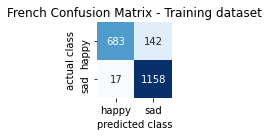

In [0]:
import matplotlib as mpl
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import pandas.util.testing as tm

cm = metrics.confusion_matrix(y_train, final_clf.predict(x_train))

np.set_printoptions(suppress=True)
mpl.rc("figure", figsize=(4, 2))

hm = sns.heatmap(cm, 
            cbar=False,
            annot=True, 
            square=True,
            fmt='d',
            yticklabels=['happy','sad'],
            xticklabels=['happy','sad'],
            cmap='Blues'
            )
plt.title('French Confusion Matrix - Training dataset')
plt.ylabel('actual class')
plt.xlabel('predicted class')
plt.tight_layout()
plt.savefig('French_Training.eps', dpi=300)
plt.show()

## TESTING ON VALIDATION DATA

In [0]:
from sklearn.preprocessing import LabelEncoder
import pickle
import numpy as np

df = pd.read_csv('/content/french_testing_data.csv')
df.columns = ['Lyrics', 'Mood']
df.head()

X_valid = df['Lyrics'].values 
y_valid = df['Mood'].values


# le = LabelEncoder()
# le.fit(y_train)
y_valid = le.transform(y_valid)


In [0]:
df

,Lyrics,Mood
0,Si ce n√©tait que mon √©preuve\nPour avoir dro...,Sad
1,Tu sais d'o√π je viens \nEt par quoi je suis p...,Sad
2,"J'ai obli√© qui j'attend depuis quand, comment...",Sad
3,"(Andr√©eWatters/Pat Frazer)\n\nTu pars, les ye...",Sad
4,Urgence\nPartout dans le monde\nLe diable dans...,Sad
...,...,...
395,(Andr√©e Watters/Catherine Durand)\n\nJe vis d...,Sad
396,"Minuit le soir, le monde s'endort \nLa nuit s'...",Happy
397,J'ai donn√© chance √† mon coeur\nD'√©garer les...,Sad
398,(Andr√©e Watters/Styve Bolduc)\n\nIl y a des r...,Sad


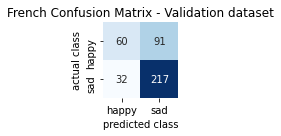

In [0]:
cm = metrics.confusion_matrix(y_valid, final_clf.predict(X_valid))

np.set_printoptions(suppress=True)
mpl.rc("figure", figsize=(4, 2))

hm = sns.heatmap(cm, 
            cbar=False,
            annot=True, 
            square=True,
            fmt='d',
            yticklabels=['happy','sad'],
            xticklabels=['happy','sad'],
            cmap='Blues'
            )
plt.title('French Confusion Matrix - Validation dataset')
plt.ylabel('actual class')
plt.xlabel('predicted class')
plt.tight_layout()
plt.savefig('French_Testing.eps', dpi=300)
plt.show()

## **METRICS**

In [0]:
# Custom scorer methods to account for positive-negative class labels

from sklearn import metrics

# `pos_label` for positive class, since we have sad=1, happy=0

acc_scorer = metrics.make_scorer(metrics.accuracy_score, greater_is_better=True)
pre_scorer = metrics.make_scorer(metrics.precision_score, greater_is_better=True, pos_label=0)
rec_scorer = metrics.make_scorer(metrics.recall_score, greater_is_better=True, pos_label=0)
f1_scorer = metrics.make_scorer(metrics.f1_score, greater_is_better=True, pos_label=0)

In [0]:
d = {'Data':['Training', 'Validation'],
     'ACC (%)':[],
     'PRE (%)':[],
     'REC (%)':[],
     'F1 (%)':[],
}

In [0]:
d['ACC (%)'].append(acc_scorer(estimator=final_clf, X=x_train, y_true=y_train))
d['PRE (%)'].append(pre_scorer(estimator=final_clf, X=x_train, y_true=y_train))
d['REC (%)'].append(rec_scorer(estimator=final_clf, X=x_train, y_true=y_train))
d['F1 (%)'].append(f1_scorer(estimator=final_clf, X=x_train, y_true=y_train))

d['ACC (%)'].append(acc_scorer(estimator=final_clf, X=X_valid, y_true=y_valid))
d['PRE (%)'].append(pre_scorer(estimator=final_clf, X=X_valid, y_true=y_valid))
d['REC (%)'].append(rec_scorer(estimator=final_clf, X=X_valid, y_true=y_valid))
d['F1 (%)'].append(f1_scorer(estimator=final_clf, X=X_valid, y_true=y_valid))

In [0]:
df_perform = pd.DataFrame(d)
df_perform = df_perform[['ACC (%)', 'PRE (%)', 'REC (%)', 'F1 (%)']]
df_perform.index=(['Training', 'Validation'])
df_perform = df_perform*100
df_perform = np.round(df_perform, decimals=2)
df_perform

,ACC (%),PRE (%),REC (%),F1 (%)
Training,92.05,97.57,82.79,89.57
Validation,69.25,65.22,39.74,49.38
